In [24]:
import torch
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import Visualizer
from detectron2.engine import DefaultTrainer
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import warnings
# These warnings are not impactful on the output
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message=".*incompatible shapes.*")

In [3]:
# Register dataset
register_coco_instances(
    "barnacle_train",
    {},
    "barnacle_dataset/annotations/train.json",  # COCO-style annotations (see below)
    "barnacle_dataset/train/images"  # Path to image directory
)

In [4]:
# Define configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("barnacle_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Pre-trained weights
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.TEST.DETECTIONS.PER_IMAGE = 1500
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 2000    # Keep training short for small dataset
cfg.SOLVER.AMP.ENABLED = True  # Enable automatic mixed precision
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Only barnacle class

# free up gpu memory
torch.cuda.empty_cache()

# Start training
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/27 19:23:33 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:474: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  grad_scaler = GradScaler()
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (3

[01/27 19:23:35 d2.engine.train_loop]: Starting training from iteration 0


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch ski

[01/27 19:24:11 d2.utils.events]:  eta: 0:11:20  iter: 19  total_loss: 5.763  loss_cls: 0.6651  loss_box_reg: 0.2091  loss_mask: 0.6935  loss_rpn_cls: 3.589  loss_rpn_loc: 0.4549    time: 1.4817  last_time: 1.0014  data_time: 0.2195  last_data_time: 0.0008   lr: 4.9953e-06  max_mem: 6828M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:24:30 d2.utils.events]:  eta: 0:13:59  iter: 39  total_loss: 3.56  loss_cls: 0.6574  loss_box_reg: 0.2834  loss_mask: 0.6888  loss_rpn_cls: 1.411  loss_rpn_loc: 0.3953    time: 1.1875  last_time: 0.3346  data_time: 0.0027  last_data_time: 0.0006   lr: 9.9902e-06  max_mem: 6828M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:24:49 d2.utils.events]:  eta: 0:13:10  iter: 59  total_loss: 2.525  loss_cls: 0.6428  loss_box_reg: 0.2775  loss_mask: 0.679  loss_rpn_cls: 0.5006  loss_rpn_loc: 0.4197    time: 1.1066  last_time: 0.8080  data_time: 0.0022  last_data_time: 0.0016   lr: 1.4985e-05  max_mem: 6844M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:25:06 d2.utils.events]:  eta: 0:13:25  iter: 79  total_loss: 2.336  loss_cls: 0.6023  loss_box_reg: 0.2986  loss_mask: 0.6649  loss_rpn_cls: 0.4297  loss_rpn_loc: 0.3741    time: 1.0456  last_time: 0.9000  data_time: 0.0022  last_data_time: 0.0017   lr: 1.998e-05  max_mem: 6844M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:25:26 d2.utils.events]:  eta: 0:13:08  iter: 99  total_loss: 2.224  loss_cls: 0.5702  loss_box_reg: 0.2994  loss_mask: 0.6461  loss_rpn_cls: 0.4004  loss_rpn_loc: 0.3324    time: 1.0312  last_time: 0.2978  data_time: 0.0041  last_data_time: 0.0011   lr: 2.4975e-05  max_mem: 6844M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:25:47 d2.utils.events]:  eta: 0:12:07  iter: 119  total_loss: 2.22  loss_cls: 0.5301  loss_box_reg: 0.3519  loss_mask: 0.6239  loss_rpn_cls: 0.3917  loss_rpn_loc: 0.3467    time: 1.0366  last_time: 0.3330  data_time: 0.0029  last_data_time: 0.0012   lr: 2.997e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:26:08 d2.utils.events]:  eta: 0:12:37  iter: 139  total_loss: 2.158  loss_cls: 0.5072  loss_box_reg: 0.3064  loss_mask: 0.6034  loss_rpn_cls: 0.3774  loss_rpn_loc: 0.3504    time: 1.0403  last_time: 1.2934  data_time: 0.0035  last_data_time: 0.0020   lr: 3.4965e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:26:31 d2.utils.events]:  eta: 0:12:31  iter: 159  total_loss: 2.042  loss_cls: 0.5023  loss_box_reg: 0.2401  loss_mask: 0.5857  loss_rpn_cls: 0.3611  loss_rpn_loc: 0.3758    time: 1.0500  last_time: 1.7915  data_time: 0.0029  last_data_time: 0.0035   lr: 3.996e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:26:50 d2.utils.events]:  eta: 0:12:13  iter: 179  total_loss: 1.966  loss_cls: 0.4828  loss_box_reg: 0.3222  loss_mask: 0.5565  loss_rpn_cls: 0.3402  loss_rpn_loc: 0.2881    time: 1.0388  last_time: 0.7631  data_time: 0.0015  last_data_time: 0.0013   lr: 4.4955e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:27:12 d2.utils.events]:  eta: 0:13:10  iter: 199  total_loss: 1.983  loss_cls: 0.4591  loss_box_reg: 0.2676  loss_mask: 0.5619  loss_rpn_cls: 0.3306  loss_rpn_loc: 0.3513    time: 1.0480  last_time: 0.2611  data_time: 0.0017  last_data_time: 0.0010   lr: 4.995e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:27:42 d2.utils.events]:  eta: 0:13:01  iter: 219  total_loss: 1.951  loss_cls: 0.447  loss_box_reg: 0.3048  loss_mask: 0.5426  loss_rpn_cls: 0.3401  loss_rpn_loc: 0.3248    time: 1.0879  last_time: 2.0487  data_time: 0.0019  last_data_time: 0.0013   lr: 5.4945e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:28:13 d2.utils.events]:  eta: 0:12:46  iter: 239  total_loss: 1.936  loss_cls: 0.4304  loss_box_reg: 0.3028  loss_mask: 0.5501  loss_rpn_cls: 0.2988  loss_rpn_loc: 0.3259    time: 1.1247  last_time: 2.1450  data_time: 0.0016  last_data_time: 0.0034   lr: 5.994e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:28:44 d2.utils.events]:  eta: 0:12:59  iter: 259  total_loss: 1.91  loss_cls: 0.4123  loss_box_reg: 0.2526  loss_mask: 0.5412  loss_rpn_cls: 0.3342  loss_rpn_loc: 0.3549    time: 1.1602  last_time: 3.4270  data_time: 0.0023  last_data_time: 0.0028   lr: 6.4935e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:29:09 d2.utils.events]:  eta: 0:12:38  iter: 279  total_loss: 1.899  loss_cls: 0.4019  loss_box_reg: 0.3418  loss_mask: 0.5138  loss_rpn_cls: 0.3151  loss_rpn_loc: 0.293    time: 1.1659  last_time: 1.5578  data_time: 0.0016  last_data_time: 0.0014   lr: 6.993e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:29:40 d2.utils.events]:  eta: 0:12:19  iter: 299  total_loss: 1.806  loss_cls: 0.3909  loss_box_reg: 0.3085  loss_mask: 0.4894  loss_rpn_cls: 0.2922  loss_rpn_loc: 0.3353    time: 1.1922  last_time: 0.7520  data_time: 0.0019  last_data_time: 0.0012   lr: 7.4925e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:30:01 d2.utils.events]:  eta: 0:11:53  iter: 319  total_loss: 1.79  loss_cls: 0.3457  loss_box_reg: 0.2848  loss_mask: 0.4908  loss_rpn_cls: 0.2969  loss_rpn_loc: 0.3171    time: 1.1819  last_time: 1.8069  data_time: 0.0013  last_data_time: 0.0014   lr: 7.992e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:30:33 d2.utils.events]:  eta: 0:11:38  iter: 339  total_loss: 1.849  loss_cls: 0.3897  loss_box_reg: 0.2325  loss_mask: 0.4908  loss_rpn_cls: 0.2969  loss_rpn_loc: 0.3518    time: 1.2059  last_time: 0.8192  data_time: 0.0022  last_data_time: 0.0014   lr: 8.4915e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:31:04 d2.utils.events]:  eta: 0:11:32  iter: 359  total_loss: 1.742  loss_cls: 0.3415  loss_box_reg: 0.3347  loss_mask: 0.4568  loss_rpn_cls: 0.2868  loss_rpn_loc: 0.33    time: 1.2265  last_time: 0.6784  data_time: 0.0017  last_data_time: 0.0017   lr: 8.991e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:31:32 d2.utils.events]:  eta: 0:11:11  iter: 379  total_loss: 1.676  loss_cls: 0.3265  loss_box_reg: 0.3063  loss_mask: 0.4188  loss_rpn_cls: 0.3128  loss_rpn_loc: 0.3152    time: 1.2348  last_time: 1.4754  data_time: 0.0018  last_data_time: 0.0015   lr: 9.4905e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:32:06 d2.utils.events]:  eta: 0:10:49  iter: 399  total_loss: 1.608  loss_cls: 0.2981  loss_box_reg: 0.2511  loss_mask: 0.405  loss_rpn_cls: 0.2863  loss_rpn_loc: 0.3199    time: 1.2596  last_time: 0.6416  data_time: 0.0020  last_data_time: 0.0013   lr: 9.99e-05  max_mem: 7112M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:32:37 d2.utils.events]:  eta: 0:10:27  iter: 419  total_loss: 1.637  loss_cls: 0.3033  loss_box_reg: 0.269  loss_mask: 0.4143  loss_rpn_cls: 0.3074  loss_rpn_loc: 0.3049    time: 1.2730  last_time: 1.7022  data_time: 0.0023  last_data_time: 0.0016   lr: 0.0001049  max_mem: 7348M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:32:59 d2.utils.events]:  eta: 0:10:02  iter: 439  total_loss: 1.528  loss_cls: 0.2839  loss_box_reg: 0.2981  loss_mask: 0.3964  loss_rpn_cls: 0.2873  loss_rpn_loc: 0.3167    time: 1.2656  last_time: 0.8155  data_time: 0.0025  last_data_time: 0.0016   lr: 0.00010989  max_mem: 7361M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:33:22 d2.utils.events]:  eta: 0:09:36  iter: 459  total_loss: 1.609  loss_cls: 0.3169  loss_box_reg: 0.2816  loss_mask: 0.3962  loss_rpn_cls: 0.2533  loss_rpn_loc: 0.3245    time: 1.2590  last_time: 2.7299  data_time: 0.0027  last_data_time: 0.0062   lr: 0.00011489  max_mem: 7361M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:33:48 d2.utils.events]:  eta: 0:09:15  iter: 479  total_loss: 1.563  loss_cls: 0.2898  loss_box_reg: 0.2878  loss_mask: 0.3989  loss_rpn_cls: 0.2729  loss_rpn_loc: 0.2662    time: 1.2608  last_time: 0.7254  data_time: 0.0025  last_data_time: 0.0014   lr: 0.00011988  max_mem: 7361M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:34:11 d2.utils.events]:  eta: 0:08:50  iter: 499  total_loss: 1.564  loss_cls: 0.3072  loss_box_reg: 0.313  loss_mask: 0.4051  loss_rpn_cls: 0.2657  loss_rpn_loc: 0.3104    time: 1.2572  last_time: 1.3922  data_time: 0.0025  last_data_time: 0.0056   lr: 0.00012488  max_mem: 7361M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:34:34 d2.utils.events]:  eta: 0:08:25  iter: 519  total_loss: 1.436  loss_cls: 0.2362  loss_box_reg: 0.2879  loss_mask: 0.3885  loss_rpn_cls: 0.248  loss_rpn_loc: 0.2505    time: 1.2525  last_time: 1.1338  data_time: 0.0022  last_data_time: 0.0019   lr: 0.00012987  max_mem: 7361M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:35:00 d2.utils.events]:  eta: 0:08:05  iter: 539  total_loss: 1.56  loss_cls: 0.3016  loss_box_reg: 0.2919  loss_mask: 0.3968  loss_rpn_cls: 0.2343  loss_rpn_loc: 0.3065    time: 1.2539  last_time: 1.8373  data_time: 0.0024  last_data_time: 0.0020   lr: 0.00013487  max_mem: 7361M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:35:30 d2.utils.events]:  eta: 0:07:47  iter: 559  total_loss: 1.526  loss_cls: 0.285  loss_box_reg: 0.2714  loss_mask: 0.3783  loss_rpn_cls: 0.2624  loss_rpn_loc: 0.3335    time: 1.2636  last_time: 2.0334  data_time: 0.0031  last_data_time: 0.0014   lr: 0.00013986  max_mem: 7361M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:35:54 d2.utils.events]:  eta: 0:07:21  iter: 579  total_loss: 1.466  loss_cls: 0.2512  loss_box_reg: 0.3101  loss_mask: 0.3786  loss_rpn_cls: 0.2644  loss_rpn_loc: 0.2756    time: 1.2607  last_time: 0.5673  data_time: 0.0023  last_data_time: 0.0009   lr: 0.00014486  max_mem: 7361M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:36:21 d2.utils.events]:  eta: 0:07:00  iter: 599  total_loss: 1.494  loss_cls: 0.2535  loss_box_reg: 0.2936  loss_mask: 0.383  loss_rpn_cls: 0.2743  loss_rpn_loc: 0.288    time: 1.2646  last_time: 1.0255  data_time: 0.0019  last_data_time: 0.0013   lr: 0.00014985  max_mem: 7361M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:36:49 d2.utils.events]:  eta: 0:06:38  iter: 619  total_loss: 1.495  loss_cls: 0.2501  loss_box_reg: 0.3047  loss_mask: 0.3917  loss_rpn_cls: 0.2547  loss_rpn_loc: 0.3058    time: 1.2687  last_time: 2.2106  data_time: 0.0027  last_data_time: 0.0054   lr: 0.00015485  max_mem: 7361M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:37:11 d2.utils.events]:  eta: 0:06:11  iter: 639  total_loss: 1.424  loss_cls: 0.2367  loss_box_reg: 0.3135  loss_mask: 0.3675  loss_rpn_cls: 0.2409  loss_rpn_loc: 0.3044    time: 1.2633  last_time: 0.8293  data_time: 0.0031  last_data_time: 0.0017   lr: 0.00015984  max_mem: 7361M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:37:42 d2.utils.events]:  eta: 0:05:53  iter: 659  total_loss: 1.393  loss_cls: 0.2165  loss_box_reg: 0.2426  loss_mask: 0.3665  loss_rpn_cls: 0.2478  loss_rpn_loc: 0.3373    time: 1.2723  last_time: 0.9719  data_time: 0.0032  last_data_time: 0.0013   lr: 0.00016484  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:38:04 d2.utils.events]:  eta: 0:05:28  iter: 679  total_loss: 1.414  loss_cls: 0.2227  loss_box_reg: 0.2873  loss_mask: 0.3535  loss_rpn_cls: 0.2492  loss_rpn_loc: 0.2686    time: 1.2661  last_time: 0.8032  data_time: 0.0023  last_data_time: 0.0041   lr: 0.00016983  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:38:31 d2.utils.events]:  eta: 0:05:08  iter: 699  total_loss: 1.416  loss_cls: 0.225  loss_box_reg: 0.2959  loss_mask: 0.3596  loss_rpn_cls: 0.2442  loss_rpn_loc: 0.2809    time: 1.2692  last_time: 2.2113  data_time: 0.0024  last_data_time: 0.0055   lr: 0.00017483  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:38:56 d2.utils.events]:  eta: 0:04:47  iter: 719  total_loss: 1.451  loss_cls: 0.2255  loss_box_reg: 0.2993  loss_mask: 0.3716  loss_rpn_cls: 0.2327  loss_rpn_loc: 0.3072    time: 1.2687  last_time: 1.0346  data_time: 0.0018  last_data_time: 0.0015   lr: 0.00017982  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:39:21 d2.utils.events]:  eta: 0:04:26  iter: 739  total_loss: 1.46  loss_cls: 0.2331  loss_box_reg: 0.2961  loss_mask: 0.3876  loss_rpn_cls: 0.2688  loss_rpn_loc: 0.2884    time: 1.2678  last_time: 1.2301  data_time: 0.0033  last_data_time: 0.0023   lr: 0.00018482  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:39:45 d2.utils.events]:  eta: 0:04:05  iter: 759  total_loss: 1.417  loss_cls: 0.2125  loss_box_reg: 0.3022  loss_mask: 0.3638  loss_rpn_cls: 0.2314  loss_rpn_loc: 0.271    time: 1.2666  last_time: 0.9292  data_time: 0.0032  last_data_time: 0.0014   lr: 0.00018981  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:40:13 d2.utils.events]:  eta: 0:03:45  iter: 779  total_loss: 1.358  loss_cls: 0.1894  loss_box_reg: 0.3046  loss_mask: 0.3559  loss_rpn_cls: 0.2487  loss_rpn_loc: 0.2678    time: 1.2694  last_time: 3.5073  data_time: 0.0026  last_data_time: 0.0052   lr: 0.00019481  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:40:43 d2.utils.events]:  eta: 0:03:25  iter: 799  total_loss: 1.355  loss_cls: 0.2033  loss_box_reg: 0.2499  loss_mask: 0.3775  loss_rpn_cls: 0.2443  loss_rpn_loc: 0.3079    time: 1.2758  last_time: 0.7933  data_time: 0.0031  last_data_time: 0.0017   lr: 0.0001998  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:41:11 d2.utils.events]:  eta: 0:03:04  iter: 819  total_loss: 1.33  loss_cls: 0.1898  loss_box_reg: 0.2991  loss_mask: 0.3548  loss_rpn_cls: 0.2042  loss_rpn_loc: 0.2681    time: 1.2783  last_time: 0.3810  data_time: 0.0027  last_data_time: 0.0012   lr: 0.0002048  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:41:37 d2.utils.events]:  eta: 0:02:44  iter: 839  total_loss: 1.365  loss_cls: 0.1722  loss_box_reg: 0.2741  loss_mask: 0.3549  loss_rpn_cls: 0.2298  loss_rpn_loc: 0.2726    time: 1.2789  last_time: 2.5983  data_time: 0.0028  last_data_time: 0.0016   lr: 0.00020979  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:42:07 d2.utils.events]:  eta: 0:02:23  iter: 859  total_loss: 1.398  loss_cls: 0.2065  loss_box_reg: 0.2847  loss_mask: 0.3719  loss_rpn_cls: 0.2171  loss_rpn_loc: 0.304    time: 1.2840  last_time: 1.1263  data_time: 0.0032  last_data_time: 0.0030   lr: 0.00021479  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:42:25 d2.utils.events]:  eta: 0:02:02  iter: 879  total_loss: 1.391  loss_cls: 0.2215  loss_box_reg: 0.3191  loss_mask: 0.3617  loss_rpn_cls: 0.2086  loss_rpn_loc: 0.2613    time: 1.2754  last_time: 0.7348  data_time: 0.0024  last_data_time: 0.0015   lr: 0.00021978  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:42:55 d2.utils.events]:  eta: 0:01:42  iter: 899  total_loss: 1.3  loss_cls: 0.173  loss_box_reg: 0.2558  loss_mask: 0.3633  loss_rpn_cls: 0.2294  loss_rpn_loc: 0.2806    time: 1.2808  last_time: 2.2379  data_time: 0.0036  last_data_time: 0.0070   lr: 0.00022478  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:43:22 d2.utils.events]:  eta: 0:01:21  iter: 919  total_loss: 1.33  loss_cls: 0.1912  loss_box_reg: 0.2781  loss_mask: 0.3591  loss_rpn_cls: 0.2296  loss_rpn_loc: 0.267    time: 1.2813  last_time: 2.0242  data_time: 0.0033  last_data_time: 0.0035   lr: 0.00022977  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:43:44 d2.utils.events]:  eta: 0:01:01  iter: 939  total_loss: 1.317  loss_cls: 0.1963  loss_box_reg: 0.3117  loss_mask: 0.3538  loss_rpn_cls: 0.1804  loss_rpn_loc: 0.225    time: 1.2780  last_time: 0.9420  data_time: 0.0021  last_data_time: 0.0030   lr: 0.00023477  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:44:06 d2.utils.events]:  eta: 0:00:40  iter: 959  total_loss: 1.373  loss_cls: 0.1894  loss_box_reg: 0.2842  loss_mask: 0.3708  loss_rpn_cls: 0.2215  loss_rpn_loc: 0.314    time: 1.2739  last_time: 0.9054  data_time: 0.0033  last_data_time: 0.0022   lr: 0.00023976  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:44:29 d2.utils.events]:  eta: 0:00:20  iter: 979  total_loss: 1.325  loss_cls: 0.1955  loss_box_reg: 0.2903  loss_mask: 0.3568  loss_rpn_cls: 0.2234  loss_rpn_loc: 0.2892    time: 1.2712  last_time: 0.9693  data_time: 0.0029  last_data_time: 0.0027   lr: 0.00024476  max_mem: 7364M


C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=self.precision):
C:\Users\Aryan Bawa\PyCharmMiscProject\.venv\Lib\site-packages\detectron2\engine\train_loop.py:493: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` 

[01/27 19:45:01 d2.utils.events]:  eta: 0:00:00  iter: 999  total_loss: 1.327  loss_cls: 0.1718  loss_box_reg: 0.2654  loss_mask: 0.3569  loss_rpn_cls: 0.2418  loss_rpn_loc: 0.3004    time: 1.2779  last_time: 1.2868  data_time: 0.0032  last_data_time: 0.0021   lr: 0.00024975  max_mem: 7364M
[01/27 19:45:01 d2.engine.hooks]: Overall training speed: 998 iterations in 0:21:15 (1.2780 s / it)
[01/27 19:45:01 d2.engine.hooks]: Total training time: 0:21:17 (0:00:01 on hooks)


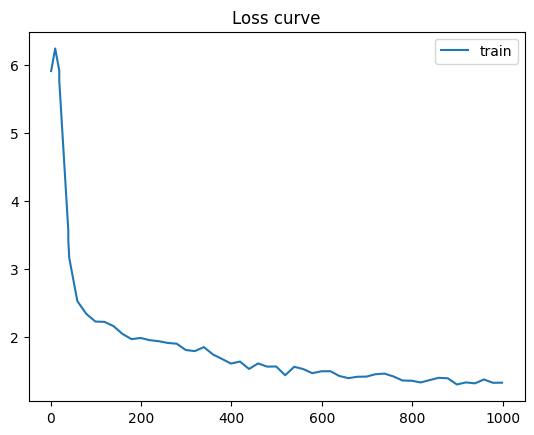

In [13]:
# plot the training loss
metrics_df = pd.read_json("./output/metrics.json", orient="records", lines=True)
mdf = metrics_df.sort_values("iteration")
mdf.head(10).T
fig, ax = plt.subplots()
mdf1 = mdf[~mdf["total_loss"].isna()]
ax.plot(mdf1["iteration"], mdf1["total_loss"], c="C0", label="train")
if "validation_loss" in mdf.columns:
    mdf2 = mdf[~mdf["validation_loss"].isna()]
    ax.plot(mdf2["iteration"], mdf2["validation_loss"], c="C1", label="validation")
# ax.set_ylim([0, 3])
ax.legend()
ax.set_title("Loss curve")
plt.show()

In [25]:
# Load trained model
cfg.MODEL.WEIGHTS = "output/model_final.pth"
predictor = DefaultPredictor(cfg)

# Predict on a new ROI
roi = cv2.imread("barnacle_dataset/test/roi_unseen_img1.png")
if roi is None:
    raise FileNotFoundError("The image 'barnacle_dataset/test/roi_unseen_img1.png' was not found or could not be read.")

outputs = predictor(roi)

# Visualize results
v = Visualizer(roi[:, :, ::-1], metadata={"thing_classes": ["barnacle"]}, scale=0.5)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2.imshow("Result", out.get_image()[:, :, ::-1])
cv2.waitKey(0)

# Count barnacles
count = len(outputs["instances"])
print(f"Barnacle count: {count}")

[01/27 21:04:41 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from output/model_final.pth ...
Barnacle count: 100
